<a href="https://colab.research.google.com/github/raff-gichira/ProjRaf/blob/main/Project_CRISP_DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Preparation

The main objective of the study is to analyze and classify the right market segment using demographic factors.

Load the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

Loading the dataset

In [ ]:
raf1=pd.read_csv('/content/drive/MyDrive/DataProjects.csv',sep=',', encoding='cp1252')

In [ ]:
raf1

,ï»¿Gender,current_position,person_industry,Level of education,Class
0,Male,Speacial Projects Manager,Telecommunications,Bachelors,0
1,Male,Capex & Project Support Analyst,Telecommunications,Bachelors,0
2,Male,Enterprise Implementation Engineer.,Computer Software & Network Security,Bachelors,1
3,Male,Lead Data Scientist,Financial Services,Masters,0
4,Male,Network Administrator,Banking,Bachelors,1
...,...,...,...,...,...
4313,Male,Head Of Sales,Financial Services,Bachelors,0
4314,Male,Facility Management,Banking,Bachelors,0
4315,Male,Data Center Manager,Financial Services,Bachelors,0
4316,Male,Associate Consultant,Telecommunications,Bachelors,1


In [ ]:
#renaming columns
dat=pd.DataFrame(raf1)
dat1=dat.rename(columns={'ï»¿Gender': 'Gender','Level of education': 'Level_education'})


NameError: ignored

In [ ]:
dat1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4318 entries, 0 to 4317
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Gender            4317 non-null   object
 1   current_position  4203 non-null   object
 2   person_industry   4300 non-null   object
 3   Level_education   4315 non-null   object
 4   Class             4318 non-null   int64 
dtypes: int64(1), object(4)
memory usage: 168.8+ KB


Dropping columns 

# Data Visualization

The key attributes to be consumed by the project includes; gender,person industy, level of education and Class

Text(0.5, 1.0, ' A bar graph of Person Industry ')

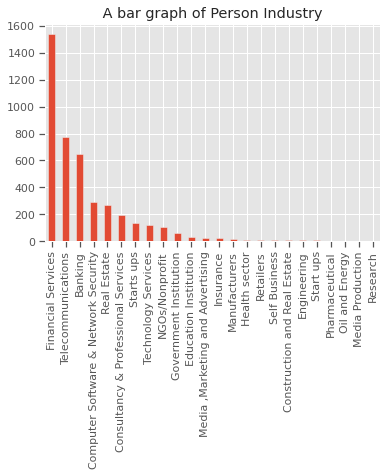

In [ ]:
dat1['person_industry'].value_counts().plot(kind='bar',grid=True)
plt.title(' A bar graph of Person Industry ')

Notes:
* The bar graph of person industry is the distribution of the candidates in accordance to the industry of work, Financial has the highest number of candidates followed by telecommunication and Banking.

Text(0.5, 1.0, ' A bar graph of Level of education')

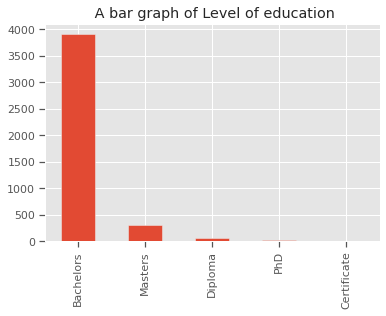

In [ ]:
dat1['Level_education'].value_counts().plot(kind='bar',grid=True)
plt.title(' A bar graph of Level of education')

Level of education distribution.

Text(0.5, 1.0, ' A bar graph of Gender ')

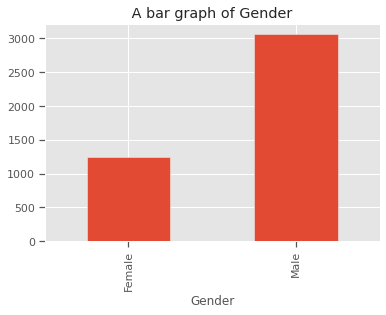

In [ ]:
dat1.groupby('Gender').size().plot(kind='bar',grid=True)
plt.title(' A bar graph of Gender ')

A Grouped Barchart

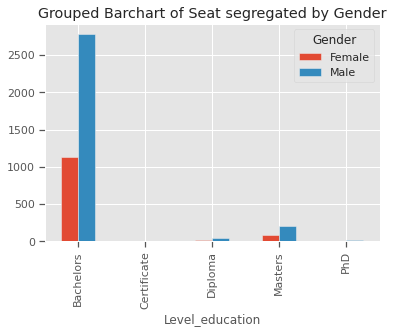

In [ ]:
pd.crosstab(dat1['Level_education'], dat1["Gender"]).plot(kind='bar',grid=True,stacked=False,title='Grouped Barchart of Seat segregated by Gender')

A comparative stacked bar graph of level of education and Gender

Mean of the quantitative variables “person_industry" by the “Gender” variable.

In [ ]:
#dat1.groupby('Gender')[['person_industry','Class']].mean()

# Evaulating the relationship

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


In [ ]:
#sns.catplot(x="Level of education", y="Gender",kind="bar", data=raf)

In [ ]:
#sns.catplot(x="Class", y="Level_education", hue="Gender", kind="swarm", data=dat1)

A Violin highlighting the distribution of the level of education against gender

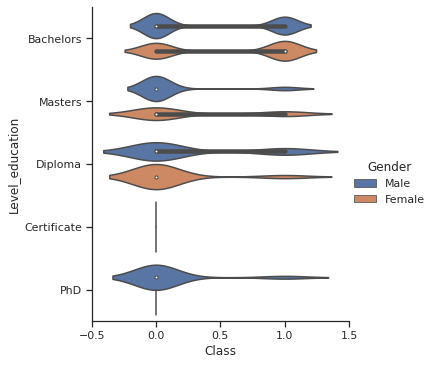

In [ ]:
sns.catplot(x="Class", y="Level_education", hue="Gender", kind="violin", data=dat1)

In this case, female  bachelors degree holder are the most responsive compared to male.

Consequently, male candidates with a masters were the most responsive compared to the female candidates, and for PhD only male that were responsive.

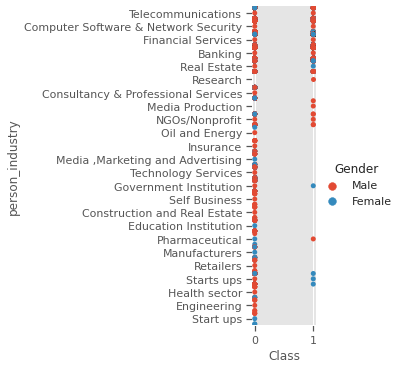

In [ ]:
sns.catplot(x="Class", y="person_industry", hue="Gender", kind="swarm", data=dat1)

Most responsive candidates where mainly from telecommunication,computer & Network Security,and Banking. Thus we may conclude that candidates in industries such as start-ups, retailers, manufacturing arent very responsive, and we recommend the marketing team to target differently and try to convert such candidates.

#Next Steps
 * populate more data
 * Perform a predictive analysis
 *  

In [ ]:
dat1.head(2)

,Gender,current_position,person_industry,Level_education,Class
0,Male,Speacial Projects Manager,Telecommunications,Bachelors,0
1,Male,Capex & Project Support Analyst,Telecommunications,Bachelors,0


In [ ]:
rrt=dat1.drop(['current_position'],axis=1)

In [ ]:
rrt

,Gender,person_industry,Level_education,Class
0,Male,Telecommunications,Bachelors,0
1,Male,Telecommunications,Bachelors,0
2,Male,Computer Software & Network Security,Bachelors,1
3,Male,Financial Services,Masters,0
4,Male,Banking,Bachelors,1
...,...,...,...,...
4313,Male,Financial Services,Bachelors,0
4314,Male,Banking,Bachelors,0
4315,Male,Financial Services,Bachelors,0
4316,Male,Telecommunications,Bachelors,1


Encoded data was used to run the predictive model.

In [ ]:
dat2=pd.read_csv('/content/DataProject1.csv')

In [ ]:
dat2.head(6)

,Gender,person_industry,Level of education,Class
0,1,1,3,0
1,1,1,3,0
2,1,2,3,1
3,1,3,4,0
4,1,4,3,1
5,1,4,3,1


In [ ]:
#renaming columns
dat2=pd.DataFrame(dat2)
dat2=dat2.rename(columns={'Level of education': 'Level_education'})


In [ ]:
#!pip install pandas-profiling[notebook,html]

In [ ]:
#!pip uninstall pandas_profiling

In [ ]:
#!pip install pandas-profiling[notebook,html]

In [ ]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
profile = ProfileReport(dat2, title="Applicants Data", html={'style': {'full_width': True}}, sort="None")

In [ ]:
profile = ProfileReport(dat2)

In [ ]:
profile

Summarize dataset:   0%|          | 0/17 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)


#Model

#K-Neighbors

 A decision was made to use KNN aligorithm for this task for varies reasons
   - The data is labelled
   - Linear SVC didnt work for this case
   - The data sample size is less than 100k
   - Then data is numerical hence KNN was the most preferred.

   
   - Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm. 
   -KNN is very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function
   - The dataset been used has low dimensions

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X = dat2[['Gender','person_industry','Level_education']]
y = dat2[['Class']]
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=11)

In [ ]:
x_train.shape

(3670, 3)

In [ ]:
x_test.shape

(1224, 3)

# Running KNN for various values of n_neighbors and storing results

In [ ]:
# Running KNN for various values of n_neighbors and storing results
knn_r_acc = []
for i in range(1,20,1):
    knn = KNeighborsClassifier()
    knn.fit(X,y)
    test_score = knn.score(x_test,y_test)
    train_score = knn.score(x_train,y_train)
    knn_r_acc.append((i, test_score ,train_score))
df = pd.DataFrame(knn_r_acc, columns=['K','Test Score','Train Score'])
print(df)

     K  Test Score  Train Score
0    1    0.754902     0.767847
1    2    0.754902     0.767847
2    3    0.754902     0.767847
3    4    0.754902     0.767847
4    5    0.754902     0.767847
5    6    0.754902     0.767847
6    7    0.754902     0.767847
7    8    0.754902     0.767847
8    9    0.754902     0.767847
9   10    0.754902     0.767847
10  11    0.754902     0.767847
11  12    0.754902     0.767847
12  13    0.754902     0.767847
13  14    0.754902     0.767847
14  15    0.754902     0.767847
15  16    0.754902     0.767847
16  17    0.754902     0.767847
17  18    0.754902     0.767847
18  19    0.754902     0.767847


#Getting the score of the model

In [ ]:
print(f'{knn.score(x_test,y_test):.2%}')

75.49%


In [ ]:
import warnings
warnings.filterwarnings("ignore")

# plot to Observe the accuracies for different values of k



Observe the accuracies for different values of k

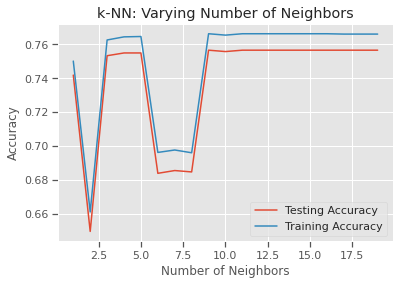

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 20,1)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X, y)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X, y)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(x_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

We can observe above that we get maximum testing accuracy for k=9. So lets create a KNeighborsClassifier with number of neighbors as 9.

In [ ]:
import pandas as pd
import numpy as np

dat2 = pd.read_csv('DataProject1.csv')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=11)


knn=KNeighborsClassifier(9)
knn.fit(X,y)

predicted=knn.predict(X=x_test)

In [ ]:
predicted

array([1, 0, 0, ..., 0, 1, 1])

In [ ]:
expected1=y_test

In [ ]:
expected1

,Class
1736,1
3094,0
1496,0
4179,1
3932,0
...,...
1333,1
4206,1
4114,0
2611,0


In [ ]:
#Fit the model
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [ ]:
#Get accuracy. 
#Note: In case of classification algorithms score method represents accuracy.
knn.score(x_test,y_test)

0.744281045751634

# confusion matrix
A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known. Scikit-learn provides facility to calculate confusion matrix using the confusion_matrix method.

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [ ]:
#let us get the predictions using the classifier we had fit above
confusion=confusion_matrix(y_true=expected1,y_pred=predicted)

In [ ]:
confusion

array([[510, 185],
       [113, 416]])

Considering confusion matrix above:

True Positive = 477

False positive = 102

True negative = 427

False negative = 218

Confusion matrix can also be obtained using crosstab method of pandas.

# Classification Report

It is a text summary of the precision, recall, F1 score for each class. Scikit-learn provides facility to calculate Classification report using the classification_report method.

In [ ]:
#import classification_report
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test,y_pred=predicted))

              precision    recall  f1-score   support

           0       0.82      0.73      0.77       695
           1       0.69      0.79      0.74       529

    accuracy                           0.76      1224
   macro avg       0.76      0.76      0.76      1224
weighted avg       0.76      0.76      0.76      1224



#heatmap

In [ ]:
import pandas as pd

In [ ]:
confusion_df=pd.DataFrame(confusion,index=range(2),columns=range(2))

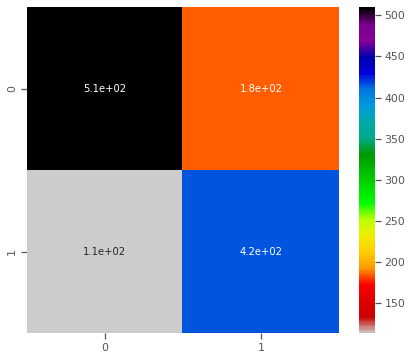

In [ ]:
import seaborn as sns
figure=plt.figure(figsize=(7,6))
axes=sns.heatmap(confusion_df,annot=True,cmap=plt.cm.nipy_spectral_r)

Common Accuracy Metrics

Accuracy =
TP + TN/(
TP + TN + FP + FN)

In [ ]:
acc=(477+427)/(477+102+218+427)*100
acc

73.8562091503268

True Positive Rate =
TP/
(TP + FN)

In [ ]:
tpr=477/(477+102)*100
tpr

82.38341968911918

True Negative Rate =
TN/
(TN + FP)

In [ ]:
tnr=427/(477+218)*100
tnr

61.43884892086331

Precision =
TP/(
TP + FP)

In [ ]:
recal=477/(477+102)*100
recal

82.38341968911918

# ROC (Reciever Operating Charecteristic) curve

It is a plot of the true positive rate against the false positive rate for the different possible cutpoints of a diagnostic test.

An ROC curve demonstrates several things:

1) It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).

2) The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.

3)The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

4) The area under the curve is a measure of test accuracy.

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [ ]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

Area under the curve

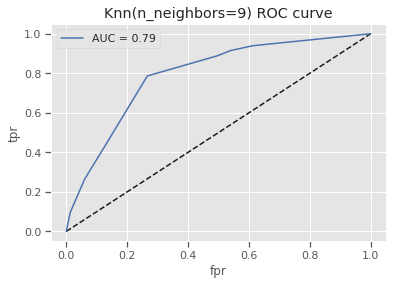

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#plt.plot(fpr,tpr, label='KNN')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=9) ROC curve')
plt.show()

#Cross Validation


The trained model's performance is dependent on way the data is split. It might not representative of the model’s ability to generalize.

The solution is cross validation.

Cross-validation is a technique to evaluate predictive models by partitioning the original sample into a training set to train the model, and a test set to evaluate it.

n k-fold cross-validation, the original sample is randomly partitioned into k equal size subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k-1 subsamples are used as training data. The cross-validation process is then repeated k times (the folds), with each of the k subsamples used exactly once as the validation data. The k results from the folds can then be averaged (or otherwise combined) to produce a single estimation. The advantage of this method is that all observations are used for both training and validation, and each observation is used for validation exactly once.

# Hyperparameter tuning

The value of k (i.e 9) we selected above was selected by observing the curve of accuracy vs number of neighbors. This is a primitive way of hyperparameter tuning.

There is a better way of doing it which involves:

1) Trying a bunch of different hyperparameter values

2) Fitting all of them separately

3) Checking how well each performs

4) Choosing the best performing one

5) Using cross-validation every time

Scikit-learn provides a simple way of achieving this using GridSearchCV i.e Grid Search cross-validation.

In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

In [ ]:
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}

In [ ]:
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
knn_cv.best_score_

0.7631699221483463

In [ ]:
knn_cv.best_params_

{'n_neighbors': 48}

Thus a knn classifier with number of neighbors as 48 achieves the best score/accuracy of 0.7631 i.e about 76%

#Area under ROC curve k=48

In [ ]:
import pandas as pd
import numpy as np

dat2 = pd.read_csv('DataProject1.csv')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

x_train,X_test,y_train,y_test=train_test_split(X,y,random_state=11)


knn=KNeighborsClassifier(48)
knn.fit(X,y)

predicted=knn.predict(X=X_test)

In [ ]:
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

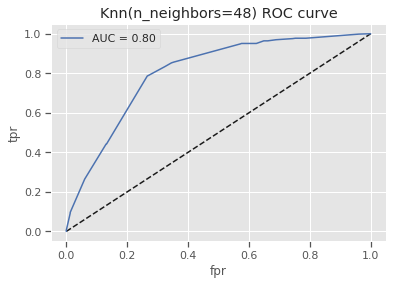

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
#plt.plot(fpr,tpr, label='KNN')
plt.legend()
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=48) ROC curve')
plt.show()

#conclusion

The model will be deployed on a website where it will give a predictive analysis, by giving a predictive probability about the applicant and the chance perctentage to be converted to class.

#Kfold Class
KFold class and function cross_val_score(sckit-learn) perform the cross validation  for estimating model accuracy on unseen data.
n_split k=10 specifies the number of folds.
shuffle is true and randomized the data splitting data into folds
if the samples are ordered or grouped

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
#kfold=KFold(n_splits=10,random_state=11,shuffle=True)

In [ ]:
kfold=KFold(n_splits=10,random_state=11,shuffle=True)

calling the function cross_val_score to train and test the model
cv= kfold= cross_validation generator

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
#X = dat2[['Gender','person_industry','Level_education']]
#y = dat2[['Class']]

In [ ]:
#X=np.array(X)
x=dat2.iloc[:,0:2].values.astype(int)
y=dat2.iloc[:,3].values.astype(int)

In [ ]:
x.shape

In [ ]:
#y.shape

In [ ]:
y=np.array(y)

In [ ]:
#type(X)

In [ ]:
score=cross_val_score(knn, x, y, cv=kfold)
score

In [ ]:
print(f'Mean Accuracy is: {score.mean():.2%}')

  - The model accuracy performance is at 70.88 % and the loss is at 29.22
  - Relationship of the module against business case.

The model will be deployed on a website where it will give a predictive analysis, by giving a predictive probability about the applicant and the chance perctentage to be converted to class.